In [ ]:
!pip install yfinance
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from datetime import datetime

import yfinance as yf
from arch import arch_model 

plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]

In [ ]:
data = yf.download("AAPL HSBC TM", start="2015-01-01", end="2022-01-01", group_by="ticker")

data.head()

[*********************100%***********************]  3 of 3 completed


TM                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2015-01-02  126.230003  126.639999  124.889999  125.669998  118.139427   
2015-01-05  124.440002  124.610001  123.050003  123.370003  115.977249   
2015-01-06  123.400002  123.720001  121.209999  122.099998  114.783348   
2015-01-07  125.519997  126.059998  125.059998  125.169998  117.669388   
2015-01-08  126.449997  127.699997  126.449997  127.580002  119.934975   

                         HSBC                                              \
            Volume       Open       High        Low      Close  Adj Close   
Date                                                                        
2015-01-02  250000  47.299999  47.330002  46.849998  47.070000  31.068819   
2015-01-05  240600  46.259998  46.340000  45.799999  45.990002  30.355955   
2015-01-06  285600  45.439999  45.680000  45.009998  45.320000  29.913712   
2015-01-07  385700  45.459999  45.720001  45.230000  45.669998  30.144735   
2015-01-08  498800  45.630001  46.009998  45.630001  45.820000  30.243750   

                          AAPL                                              \
             Volume       Open       High        Low      Close  Adj Close   
Date                                                                         
2015-01-02  1446500  27.847500  27.860001  26.837500  27.332500  24.565699   
2015-01-05  2599600  27.072500  27.162500  26.352501  26.562500  23.873642   
2015-01-06  3408100  26.635000  26.857500  26.157499  26.565001  23.875895   
2015-01-07  2122400  26.799999  27.049999  26.674999  26.937500  24.210678   
2015-01-08  1601600  27.307501  28.037500  27.174999  27.972500  25.140909   

                       
               Volume  
Date                   
2015-01-02  212818400  
2015-01-05  257142000  
2015-01-06  263188400  
2015-01-07  160423600  
2015-01-08  237458000

###  Скачиваем котировки компаний 

In [ ]:
prices = []

for ticker in data.columns.levels[0]:

    temp = data[ticker]['Close']
    temp.name = ticker
    prices.append(temp)

    
prices = pd.concat(prices, axis=1)

prices.head()

,AAPL,HSBC,TM
Date,,,
2015-01-02,27.332500,47.070000,125.669998
2015-01-05,26.562500,45.990002,123.370003
2015-01-06,26.565001,45.320000,122.099998
2015-01-07,26.937500,45.669998,125.169998
2015-01-08,27.972500,45.820000,127.580002


###  Строим график цен и смотрим на него

Text(0.5, 1.0, 'Stock price')

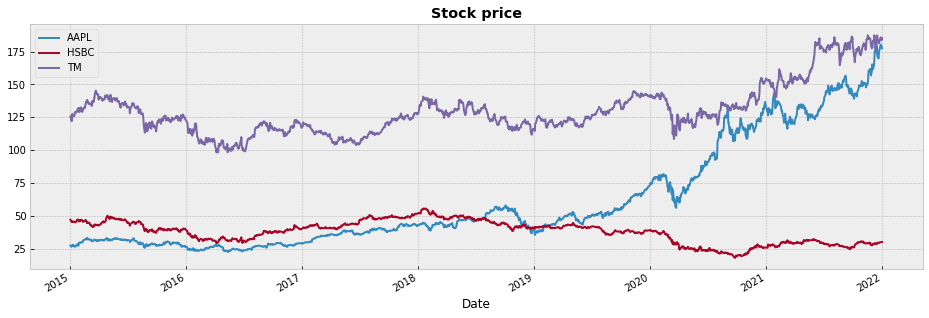

In [ ]:
prices.plot(figsize=(16, 5))
plt.title("Stock price", weight="bold")

###  Теперь посмотрим на графики доходностей

In [ ]:
returns = 100*prices.pct_change().dropna()

returns.head()

,AAPL,HSBC,TM
Date,,,
2015-01-05,-2.817161,-2.294451,-1.830187
2015-01-06,0.009414,-1.456843,-1.029427
2015-01-07,1.402219,0.772283,2.514332
2015-01-08,3.842227,0.328447,1.925384
2015-01-09,0.107251,-0.523784,-1.175733


Text(0.5, 1.0, 'Daily returns')

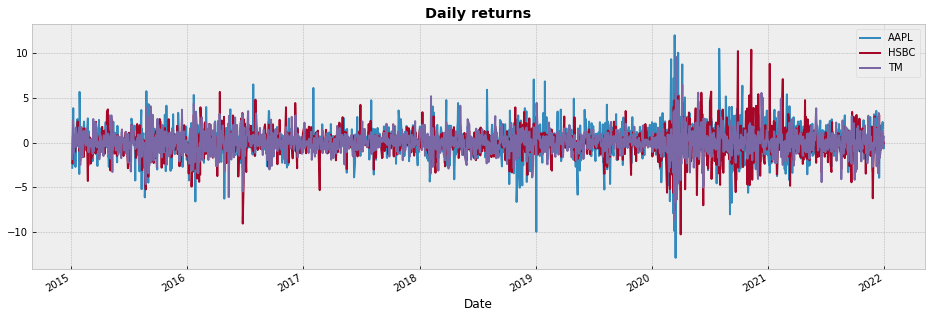

In [ ]:
returns.plot(figsize=(16, 5))
plt.title("Daily returns", weight="bold")

Text(0.5, 1.0, 'Daily returns')

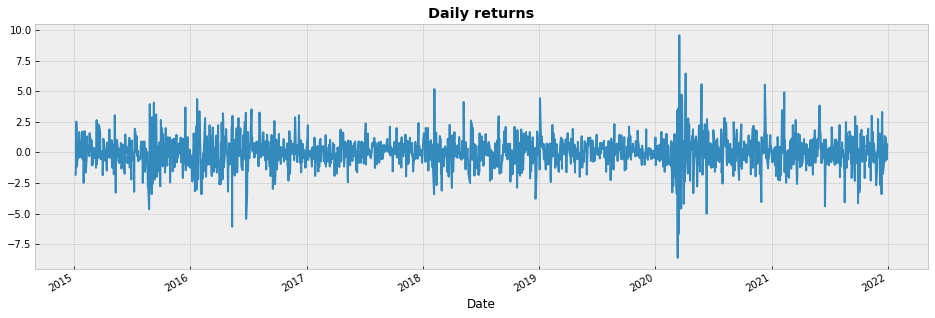

In [ ]:
ret = returns['TM']

ret.plot(figsize=(16, 5))
plt.title("Daily returns", weight="bold")

### А теперь посмотрим на гистограмму распределения доходностей



Text(0.5, 1.0, 'Histogram of daily returns')

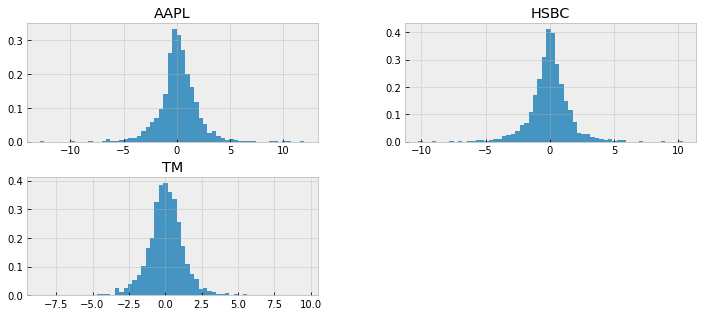

In [ ]:
returns.hist(bins=60, density=True, histtype="stepfilled", alpha=0.9, figsize=(12, 5))
plt.title("Histogram of daily returns", weight="bold")

Text(0.5, 1.0, 'Histogram of daily returns')

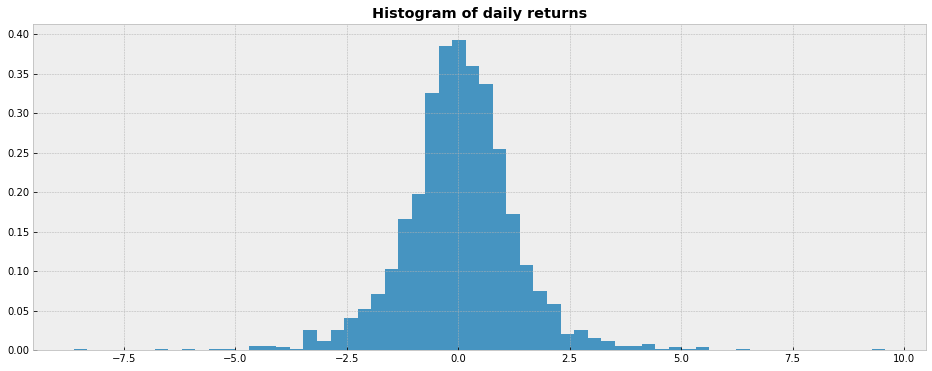

In [ ]:
ret.hist(bins=60, density=True, histtype="stepfilled", alpha=0.9, figsize=(16, 6))
plt.title("Histogram of daily returns", weight="bold")

### Сначала посчитаем метрики самым простым способом -- Historical Simulation

Делать все будем для уровня потерь в 10%, посмотрим на каждую акцию по-отдельности

In [ ]:
alpha = 0.10

In [ ]:
ret = returns['AAPL']

returns.columns

Index(['AAPL', 'HSBC', 'TM'], dtype='object')

Value-at-Risk: -1.90%
Expected Shortfall: -3.24%


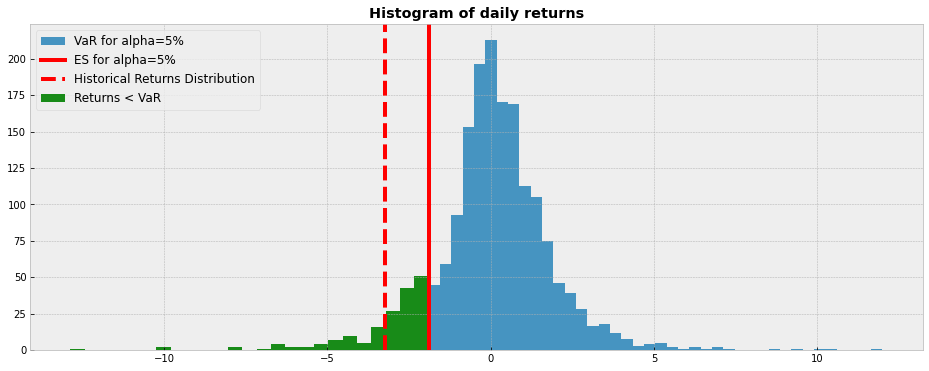

In [ ]:
VaR_HS = ret.quantile(alpha)
ES_HS = ret[ret < VaR_HS].mean()

ret[ret >= VaR_HS].hist(bins=40, histtype="stepfilled", alpha=0.9, figsize=(16, 6))
plt.hist(ret[ret < VaR_HS], alpha=0.9, bins=25, color='g')
plt.title("Histogram of daily returns", weight="bold")

plt.axvline(x=VaR_HS, linewidth=4, color="r")
plt.axvline(ES_HS, linewidth=4, color='red', linestyle='dashed')

plt.legend(['VaR for alpha=5%',
            'ES for alpha=5%',
            'Historical Returns Distribution', 
            'Returns < VaR'], fontsize=12)

print('Value-at-Risk: {:.2f}%'.format(VaR_HS))
print('Expected Shortfall: {:.2f}%'.format(ES_HS))

### Теперь будем использовать разные модельные распределения для аппроксимации

### И начнем с нормального распределения

In [ ]:
ret = returns['AAPL']

returns.columns

Index(['AAPL', 'HSBC', 'TM'], dtype='object')

Value-at-Risk: -2.22%
Expected Shortfall: -3.09%


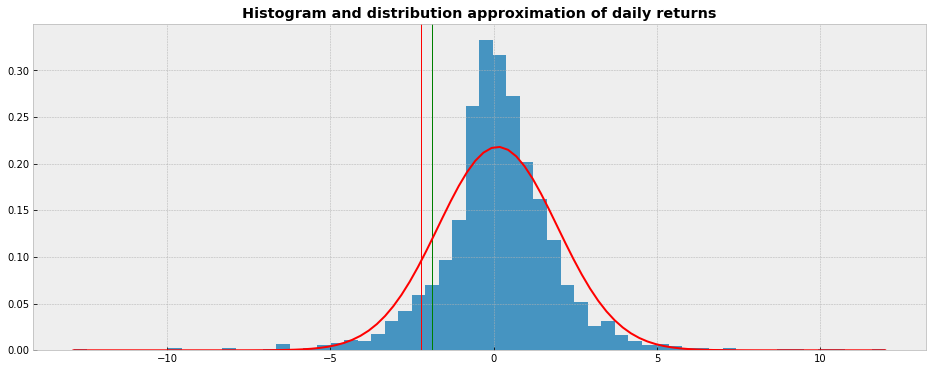

In [ ]:
norm_mean, norm_sigma = scipy.stats.norm.fit(ret)

VaR_norm = scipy.stats.norm.ppf(alpha, norm_mean, norm_sigma)
ES_norm = scipy.stats.norm.expect(loc=norm_mean, scale=norm_sigma, ub=VaR_norm, conditional=True)

support = np.linspace(ret.min(), ret.max(), 100)

ret.hist(bins=60, density=True, histtype="stepfilled", alpha=0.9, figsize=(16, 6))
plt.axvline(x=VaR_norm, linewidth=1, color="r")
plt.axvline(x=VaR_HS, linewidth=1, color="g")

plt.plot(support, scipy.stats.norm.pdf(support, loc=norm_mean, scale=norm_sigma), "r-")
plt.title("Histogram and distribution approximation of daily returns", weight="bold")

print('Value-at-Risk: {:.2f}%'.format(VaR_norm))
print('Expected Shortfall: {:.2f}%'.format(ES_norm))

Text(0.5, 1.0, 'Normal QQ-plot of daily returns')

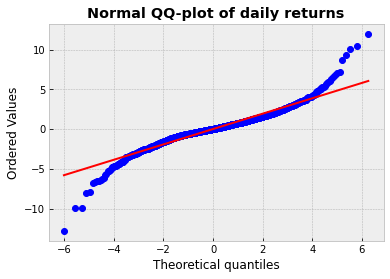

In [ ]:
scipy.stats.probplot(ret, dist=scipy.stats.norm, sparams=(norm_mean, norm_sigma), plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of daily returns", weight="bold")

### Теперь попробуем распределение Стьюдента

In [ ]:
ret = returns['HSBC']

returns.columns

Index(['AAPL', 'HSBC', 'TM'], dtype='object')

Estimated parameters: 2.815245264926979 0.008645458025737154 0.9568265259769437
Value-at-Risk: -1.59%
Expected Shortfall: -2.90%


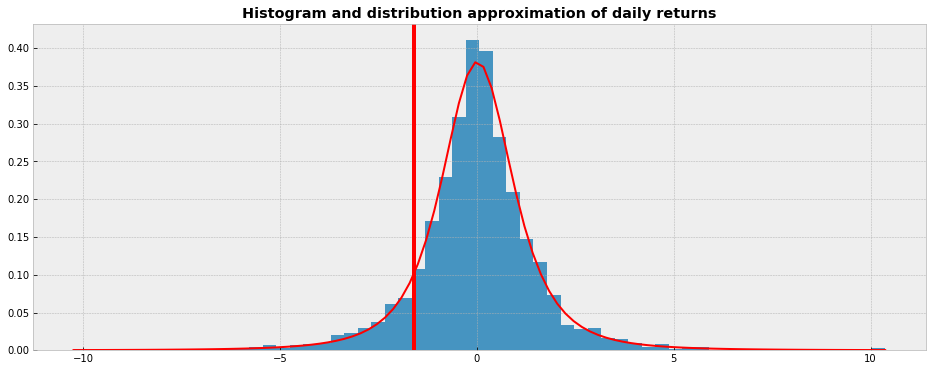

In [ ]:
t_df, t_mean, t_sigma = scipy.stats.t.fit(ret)

VaR_t = scipy.stats.t.ppf(alpha, t_df, t_mean, t_sigma)
ES_t = scipy.stats.t.expect(args=(t_df,), loc=t_mean, scale=t_sigma, ub=VaR_t, conditional=True)

support = np.linspace(ret.min(), ret.max(), 100)

ret.hist(bins=60, density=True, histtype="stepfilled", alpha=0.9, figsize=(16, 6))

plt.plot(support, scipy.stats.t.pdf(support, loc=t_mean, scale=t_sigma, df=t_df), "r-")
plt.axvline(x=VaR_t, linewidth=4, color="r")

plt.title("Histogram and distribution approximation of daily returns", weight="bold")

print('Estimated parameters:', t_df, t_mean, t_sigma)
print('Value-at-Risk: {:.2f}%'.format(VaR_t))
print('Expected Shortfall: {:.2f}%'.format(ES_t))

Text(0.5, 1.0, 'Student QQ-plot of daily returns')

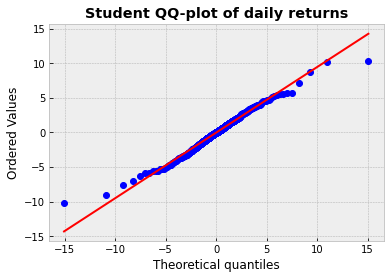

In [ ]:
scipy.stats.probplot(ret, dist=scipy.stats.t, sparams=(t_df, t_mean, t_sigma), plot=plt.figure().add_subplot(111))
plt.title("Student QQ-plot of daily returns", weight="bold")

### И наконец, попробуем использовать обобщенное нормальное распределение

In [ ]:
ret = returns['AAPL']

returns.columns

Index(['AAPL', 'HSBC', 'TM'], dtype='object')

Estimated parameters: 0.9697332768943017 0.08969320784554272 1.1988239561306373
Value-at-Risk: -1.93%
Expected Shortfall: -3.21%


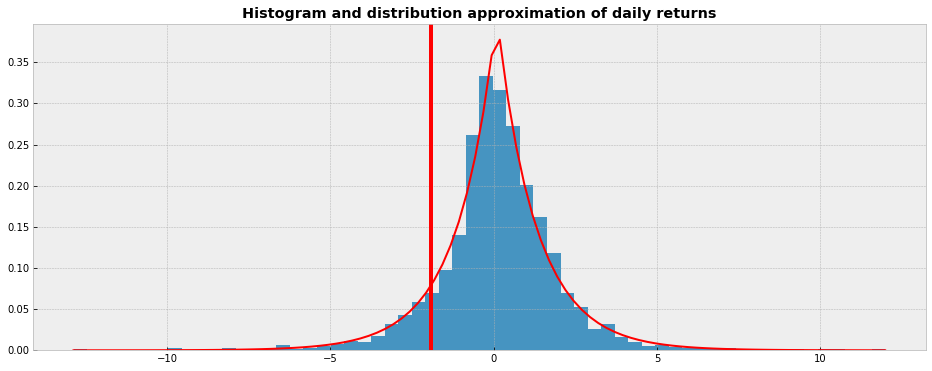

In [ ]:
beta, loc, scale = scipy.stats.gennorm.fit(ret)

VaR_gennorm = scipy.stats.gennorm.ppf(alpha, beta, loc, scale)
ES_gennorm = scipy.stats.gennorm.expect(args=(beta,), loc=loc, scale=scale, ub=VaR_gennorm, conditional=True)

support = np.linspace(ret.min(), ret.max(), 100)

ret.hist(bins=60, density=True, histtype="stepfilled", alpha=0.9, figsize=(16, 6))
plt.axvline(x=VaR_gennorm, linewidth=4, color="r")

plt.plot(support, scipy.stats.gennorm.pdf(support, beta, loc, scale), "r-")
plt.title("Histogram and distribution approximation of daily returns", weight="bold")

print('Estimated parameters:', beta, loc, scale)
print('Value-at-Risk: {:.2f}%'.format(VaR_gennorm))
print('Expected Shortfall: {:.2f}%'.format(ES_gennorm))

Text(0.5, 1.0, 'Student QQ-plot of daily returns')

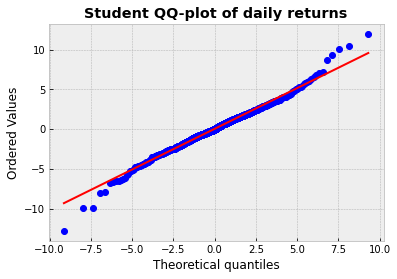

In [ ]:
scipy.stats.probplot(ret, dist=scipy.stats.gennorm, sparams=(beta, loc, scale), plot=plt.figure().add_subplot(111))
plt.title("Student QQ-plot of daily returns", weight="bold")

### Вроде бы все получается хорошо, но левый "хвост" распределения моделировать все равно сложно

### Так давайте использовать Теорию экстремальных значений!

### Здесь мы начнем с распределения максим и Generalized Extreme Value distribution

In [ ]:
ret = returns['AAPL']

returns.columns

Index(['AAPL', 'HSBC', 'TM'], dtype='object')

In [ ]:
n = 50

m = int(len(ret)/n)
print(n, 'блоков по', m, 'наблюдений')
maximas = []

for j in range(n):
    new_maximum = (-ret[j*m+1:(j+1)*m]).max()
    
    maximas.append(new_maximum)
    
maximas = np.array(maximas)

50 блоков по 35 наблюдений


### Это гистограмма распределения минимальных значений в каждом блоке по 20 наблюдений -- то есть это минимальные значения доходностей в каждые 4 рабочие недели

Text(0.5, 1.0, 'Histogram of maximas (left tail)')

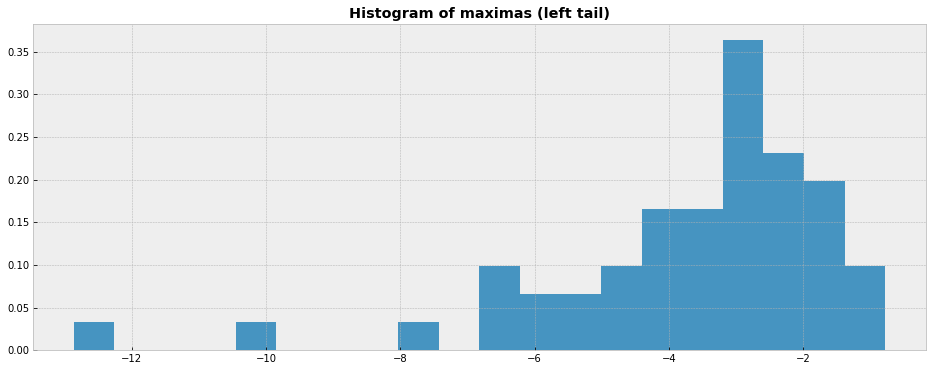

In [ ]:
fig = plt.figure()
fig.set_size_inches(16,6)

plt.hist(-maximas, bins=20, density=True, histtype="stepfilled", alpha=0.9)
plt.title("Histogram of maximas (left tail)", weight="bold")

### Как видите, наблюдений тут мало, поэтому GEV распределение как будто не очень "попадает" в данные

0.9697332768943017 2.669816174920263 1.388389255201734


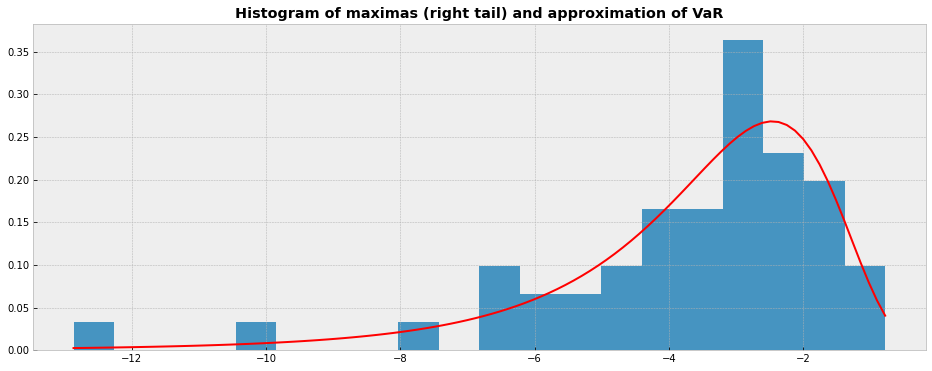

In [ ]:


b, loc, scale = scipy.stats.genextreme.fit(maximas)

support = np.linspace(maximas.min(), maximas.max(), 100)

fig = plt.figure()
fig.set_size_inches(16,6)
plt.hist(-maximas, bins=20, density=True, histtype="stepfilled", alpha=0.9)

plt.plot(-support, scipy.stats.genextreme.pdf(support, b, loc, scale), "r-")
plt.title("Histogram of maximas (right tail) and approximation of VaR", weight="bold")

print(beta, loc, scale)

### Однако график квантиль-квантиль выглядит хорошо, лишь самые экстремальные значения моделируются не идеально

Text(0.5, 1.0, 'Student QQ-plot of maximal returns')

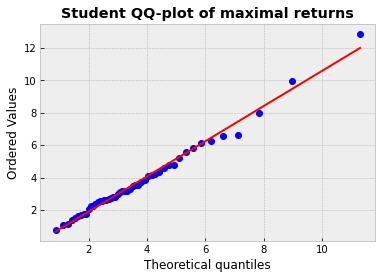

In [ ]:
scipy.stats.probplot(maximas, dist=scipy.stats.genextreme, sparams=(b, loc, scale), plot=plt.figure().add_subplot(111))
plt.title("Student QQ-plot of maximal returns", weight="bold")

### Теперь будем моделировать сам левый хвост распределения доходностей с помощью Generalized Pareto распределения

In [ ]:
ret = returns['TM']

returns.columns

Index(['AAPL', 'HSBC', 'TM'], dtype='object')

In [ ]:
u = ret.quantile(alpha*2)

print(u)

ret_tail = ret[ret <= u]

-0.8354829575019005


Text(0.5, 1.0, 'Histogram of left tail')

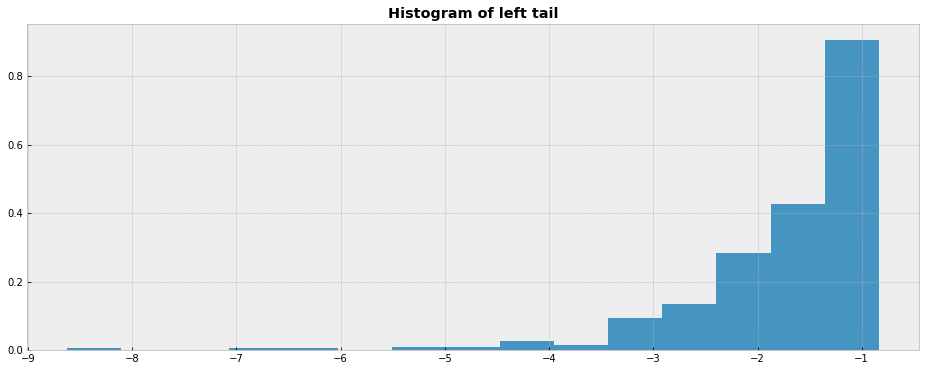

In [ ]:
fig = plt.figure()
fig.set_size_inches(16,6)

plt.hist(ret_tail, bins=15, density=True, histtype="stepfilled", alpha=0.9)
plt.title("Histogram of left tail", weight="bold")

0.9697332768943017 0.00836375511566068 0.00832596213346929


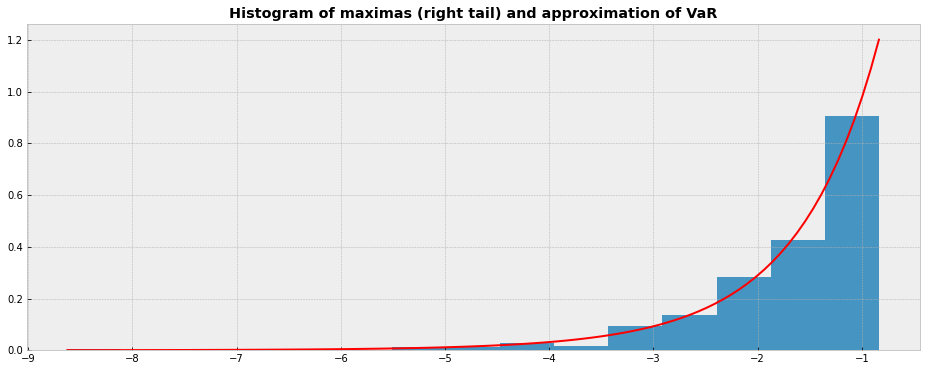

In [ ]:


c, loc, scale = scipy.stats.genpareto.fit(-ret_tail/100)

support = np.linspace(ret_tail.min(), ret_tail.max(), 100)

fig = plt.figure()
fig.set_size_inches(16,6)
plt.hist(ret_tail, bins=15, density=True, histtype="stepfilled", alpha=0.9)

plt.plot(support, scipy.stats.genpareto.pdf(-support/100, c, loc, scale)/100, "r-")
plt.title("Histogram of maximas (right tail) and approximation of VaR", weight="bold")

print(beta, loc, scale)

Text(0.5, 1.0, 'Student QQ-plot of maximal returns')

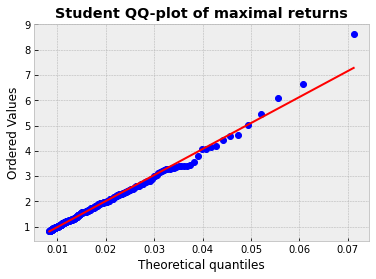

In [ ]:
scipy.stats.probplot(-ret_tail, dist=scipy.stats.genpareto, sparams=(c, loc, scale), plot=plt.figure().add_subplot(111))
plt.title("Student QQ-plot of maximal returns", weight="bold")

### До этого, мы никак не учитывали временную структуру доходностей -- самое время это сделать! Еще раз посмотрим на график доходностей во времени (не гистограмму)

Text(0.5, 1.0, 'Daily returns')

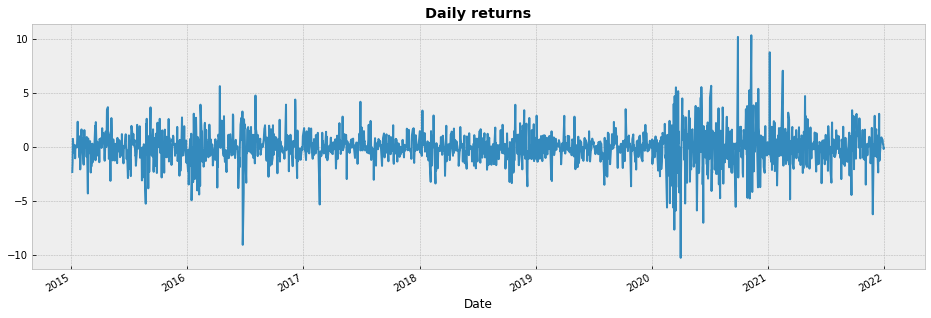

In [ ]:
ret = returns['HSBC']

ret.plot(figsize=(16, 5))
plt.title("Daily returns", weight="bold")

### Для этого будем использовать модель ARMA-GARCH

### Она позволяет отдельно моделировать три компонетны нашего ряда:
 - условное среднее -- ARMA
 - условную дисперсию -- GARCH
 - распределение нормированных остатков
 


In [ ]:
ret = returns['AAPL']

returns.columns

Index(['AAPL', 'HSBC', 'TM'], dtype='object')

In [ ]:
T = 5

ret_estimation = ret[:-T]
ret_test = ret[-T:]

scaling_const = 1.0 #10 / ret_estimation.std()

dist = 'ged'
am = arch_model(scaling_const * ret_estimation,
                    mean='HARX', lags=5, # mean = Constant, ARX, HARX + the number of lags
                    vol='Garch', p=1, o=1, q=1, # vol = Garch, EGARCH, HARCH + the number of lags
                    dist=dist) # dist = Normal, t, skewstudent, ged

res = am.fit(update_freq=0, disp='off')

forecasts = res.forecast(horizon=T)

cond_mean = forecasts.mean.iloc[-1]
cond_var = forecasts.variance.iloc[-1]

if dist == 'Normal':
    q = am.distribution.ppf(alpha)
elif dist == 't' or dist == 'ged':
    q = am.distribution.ppf(alpha, res.params[-1:])
elif dist == 'skewstudent':
    q = am.distribution.ppf(alpha, res.params[-2:])

return_garch_forecast = cond_mean / scaling_const
VaR_garch_forecast = (cond_mean + cond_var * q) / scaling_const

return_garch_forecast.index = ret_test.index
VaR_garch_forecast.index = ret_test.index

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


### Вот график предыдущих значений, на которых мы оценивали параметры модели + предсказания на 5 дней вперед

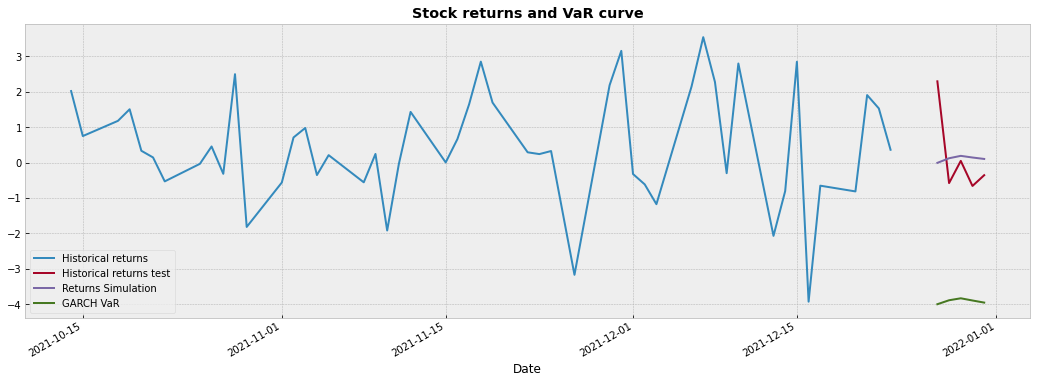

In [ ]:
fig = plt.figure()
fig.set_size_inches(18, 6)
ret_estimation[-50:].plot()
ret_test.plot()

return_garch_forecast.plot()
VaR_garch_forecast.plot()

plt.title("Stock returns and VaR curve", weight="bold")

plt.legend(['Historical returns',
            'Historical returns test',
            'Returns Simulation',
           'GARCH VaR'])

Text(0.5, 1.0, 'Student QQ-plot of maximal returns')

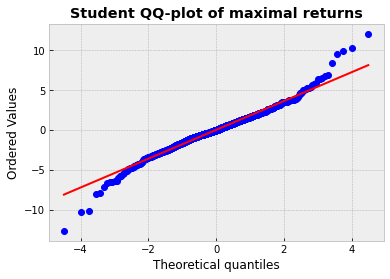

In [ ]:
# , sparams=tuple(res.params[-1:])
scipy.stats.probplot(res.resid.dropna(), dist=am.distribution, sparams=(res.params[-1:],), plot=plt.figure().add_subplot(111))
plt.title("Student QQ-plot of maximal returns", weight="bold")